# Lesson 1 

Outline

- Rewrite lesson 1
- do your own dataset 
- Plot LR vs time and loss vs LR
- Change epoch, LR, other parameters...

Papers
- Visualizing and Understanding CNN architecture Zeilor
- Cyclical Learning rates Leslie

Learned i have to put this before every notebook
```
import sys
sys.path.append ('../../')
```

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import sys
sys.path.append ('../../')

In [48]:
# This file contains all the main external libs we'll use
from fastai.imports import *

D:\Users\aznro\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
D:\Users\aznro\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [49]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

ModuleNotFoundError: No module named 'fastai.transforms'

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [8]:
PATH = "data/coil"
sz=224

## First Look at cup pictures

In [9]:
import os
os.listdir(PATH)

['coil-100']

Object 10 is a white cup with stripes

In [12]:
os.listdir(f'{PATH}/coil-100/obj_10')

['train', 'test']

Object 11 is a brown cup

In [13]:
os.listdir(f'{PATH}/coil-100/obj_11')

['train', 'test']

I placed five pictures in each of the test and the rest in train

In [34]:
cup_10 = os.listdir(f'{PATH}/coil-100/obj_10/train')[:5]
cup_10

['obj10__0.png',
 'obj10__10.png',
 'obj10__100.png',
 'obj10__105.png',
 'obj10__110.png']

In [35]:
cup_11 = os.listdir(f'{PATH}/coil-100/obj_11/train')[:5]
cup_11

['obj11__0.png',
 'obj11__10.png',
 'obj11__100.png',
 'obj11__105.png',
 'obj11__110.png']

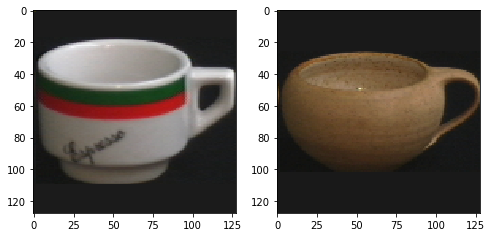

In [43]:
import matplotlib.pyplot as plt
w = 15
h = 15
fig = plt.figure(figsize=(8,8))
img1 = plt.imread(f'{PATH}/coil-100/obj_10/train/{cup_10[0]}')
fig.add_subplot(1, 2, 1)
plt.imshow(img1)
img2 = plt.imread(f'{PATH}/coil-100/obj_11/train/{cup_11[0]}')
fig.add_subplot(1, 2, 2)
plt.imshow(img2)
plt.show()

In [46]:
img1.shape, img2.shape

((128, 128, 3), (128, 128, 3))

In [47]:
img1[:4,:4]

array([[[0.20784314, 0.2       , 0.1254902 ],
        [0.20784314, 0.2       , 0.03921569],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235]],

       [[0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235]],

       [[0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235]],

       [[0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235],
        [0.10588235, 0.10588235, 0.10588235]]], dtype=float32)